Problem statement.

Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import chardet

# Determine the encoding of the CSV file
with open('book.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# Read the CSV file with the detected encoding
df = pd.read_csv('book.csv', encoding=result['encoding'])
# df.rename(columns={'User.ID':"userId",'Book.Title':'Book','Book.Rating':"rating"},inplace=True)
df = df.drop(df.columns[0], axis=1)


In [3]:
df.shape

(10000, 3)

In [4]:
df.head()

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [5]:
df.describe()
# df.rename(columns={'User.ID':"userId",'Book.Title':'Book','Book.Rating':"rating"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      10000 non-null  int64 
 1   BookTitle   10000 non-null  object
 2   BookRating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df['UserID'].nunique()

2182

In [7]:
df['BookTitle'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: BookTitle, Length: 9659, dtype: int64

In [8]:
df['BookRating'].nunique()

10

# Data Visualization¶

In [9]:
#Countplot
# sns.countplot(df['Book'])

<AxesSubplot:xlabel='BookRating', ylabel='count'>

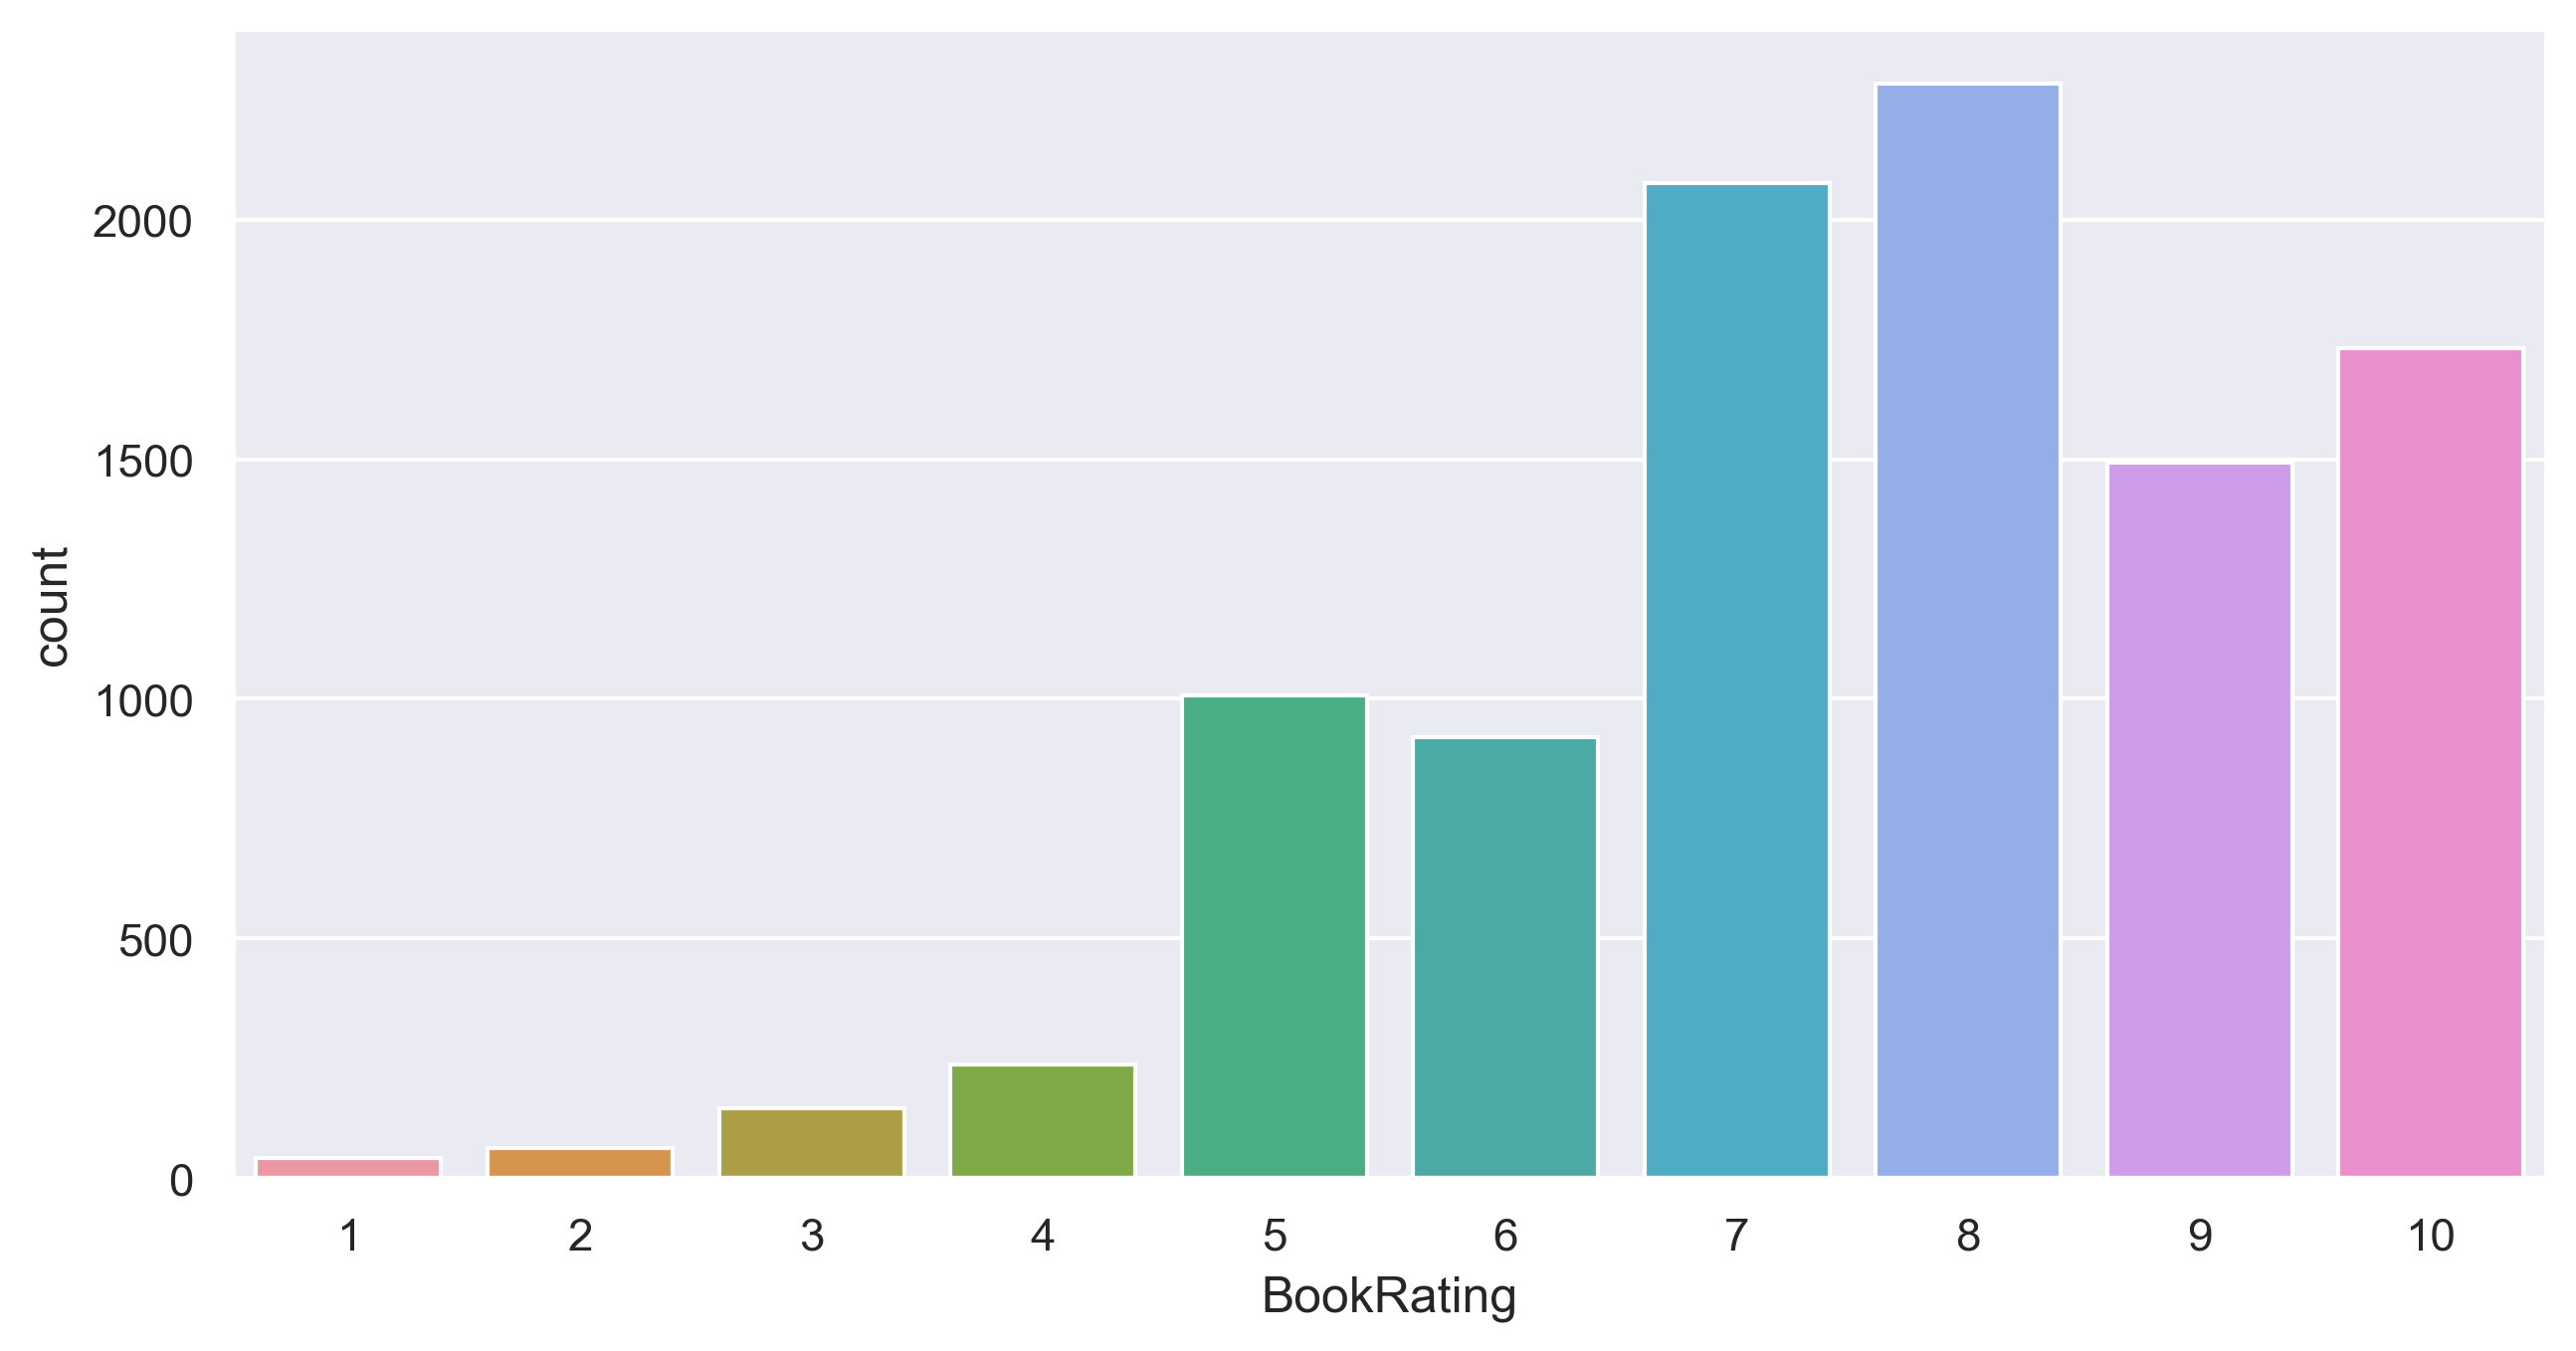

In [10]:
sns.countplot(df['BookRating'])

In [11]:
# Pie chart
# df['Book'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

<AxesSubplot:ylabel='BookRating'>

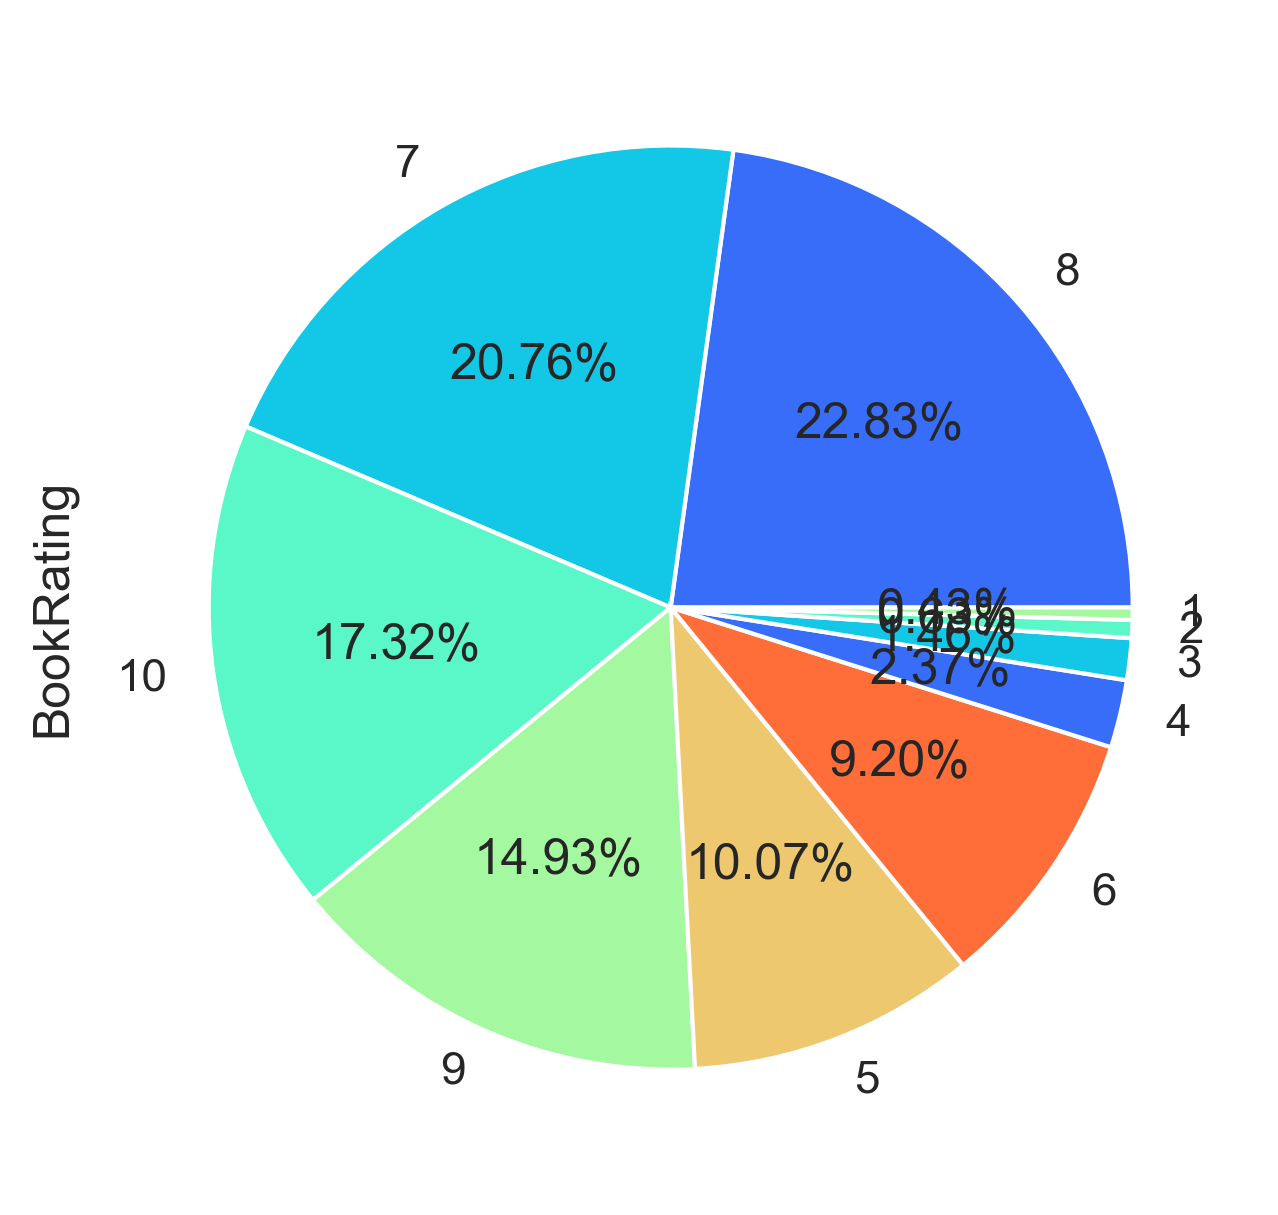

In [12]:
df['BookRating'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

In [13]:
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()
# Remove duplicate entries
df = df.drop_duplicates(subset=['UserID', 'BookTitle'])
df

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


# Model building

In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Pivot the DataFrame to create a user-item matrix:
user_item_matrix = df.pivot(index='UserID', columns='BookTitle', values='BookRating').fillna(0)
user_item_matrix


BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [37]:
# Normalize the ratings using MinMaxScaler:

scaler = MinMaxScaler()
scaled_ratings = scaler.fit_transform(user_item_matrix)
scaled_user_item_matrix = pd.DataFrame(scaled_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Calculate the cosine similarity matrix:
cosine_sim_matrix = cosine_similarity(scaled_user_item_matrix, scaled_user_item_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=scaled_user_item_matrix.index, columns=scaled_user_item_matrix.index)
cosine_sim_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
# Define a function to get the top N similar users for a given user:
def get_similar_users(user_id, top_n=5):
    similar_users = cosine_sim_df[user_id].sort_values(ascending=False)[1:top_n+1]
    return similar_users


In [47]:
# Define a function to recommend books for a given user based on similar users' ratings:
def recommend_books(user_id, top_n=5):
    similar_users = get_similar_users(user_id, top_n)
#     print(similar_users)
    recommended_books = []
    for user in similar_users.index:
        user_ratings = user_item_matrix.loc[user]
        unrated_books = user_ratings[user_ratings != 0].index
        recommended_books.extend(unrated_books)
    recommended_books = list(set(recommended_books))[:top_n]
#     print(unrated_books)
    return recommended_books


In [55]:
user_id = [161706,161750,276737,276748]

for i,userid in enumerate(user_id):
    recommendations =recommend_books(userid)
   # ANSI escape sequence for bold black color
    bold_black_color_code = "\033[1;30m"

    # ANSI escape sequence to reset text formatting
    reset_format_code = "\033[0m"
    print("\n")    
    header = f"Recommended Books for user: {userid}"

    print(f"{bold_black_color_code}{header}{reset_format_code}")
    print("--------------------------------------")
    # ANSI escape sequence for bold maroon color
    bold_maroon_color_code = "\033[1;31m"

    # ANSI escape sequence to reset text formatting
    reset_format_code = "\033[0m"


    for book in recommendations:
        print(f"•{bold_maroon_color_code}{book}{reset_format_code}")
    
    




Recommended Books for user: 161706
--------------------------------------
•Pooh's Workout Book
•The Corner : A Year in the Life of an Inner-City Neighborhood
•Daydreams
•Katwalk (Kat Colorado Mysteries)
•Night Train to Memphis


Recommended Books for user: 161750
--------------------------------------
•Parzival and the Stone from Heaven: A Grail Romance Retold for Our Time
•Mendoza in Hollywood (A Novel of the Company, Book 3)
•Mama Day (Vintage Contemporaries)
•The Book of Fire (Kellogg, M. Bradley. Dragon Quartet, V. 3.)
•The Rapture of Canaan


Recommended Books for user: 276737
--------------------------------------
•The Bitch in the House : 26 Women Tell the Truth About Sex, Solitude, Work, Motherhood, and Marriage
•Pooh's Workout Book
•The Corner : A Year in the Life of an Inner-City Neighborhood
•Black Boy (American Hunger : a Record of Childhood and Youth)
•Daydreams


Recommended Books for user: 276748
--------------------------------------
•The Bitch in the House : 26 Women